In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the stroke dataset
data_path = '/content/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(data_path)

# Check for missing values
print(df.isnull().sum())

# Fill missing values (for example, BMI)
imputer = SimpleImputer(strategy='mean')
df['bmi'] = imputer.fit_transform(df[['bmi']])

# Drop any remaining missing values if needed
df.dropna(inplace=True)

# Convert categorical variables into dummy/one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop('stroke', axis=1)  # Features
y = df['stroke']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


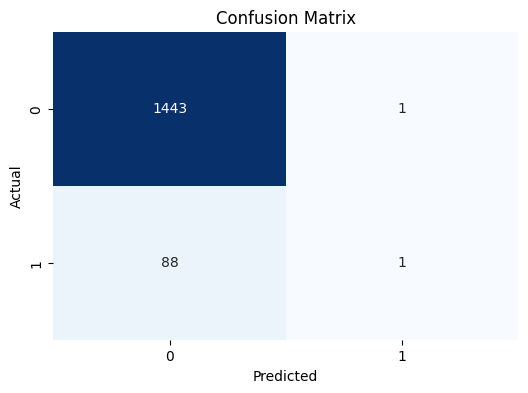

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.50      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.72      0.51      0.50      1533
weighted avg       0.92      0.94      0.92      1533



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the stroke dataset
data_path = '/content/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(data_path)
# Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Check for missing values
print(df.isnull().sum())

# Fill missing values (for example, BMI)
imputer = SimpleImputer(strategy='mean')
df['bmi'] = imputer.fit_transform(df[['bmi']])



# Drop any remaining missing values if needed
df.dropna(inplace=True)

# Convert categorical variables into dummy/one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop('stroke', axis=1)  # Features
y = df['stroke']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report for precision, recall, F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
#print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.50      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.72      0.51      0.50      1533
weighted avg       0.92      0.94      0.92      1533



In [ ]:
pip install mpi4py


mpi4py is a Python package that provides bindings to the Message Passing Interface (MPI), allowing Python programs to exploit multiple processors or nodes in a distributed computing environment. MPI is a standard for parallel programming, primarily used in high-performance computing (HPC). It enables communication between processes running on different processors or across multiple machines (nodes) in a cluster.

How mpi4py Works
MPI uses a distributed memory model, where each process has its own memory, and communication happens explicitly through message passing. mpi4py allows you to write parallel programs by managing this communication between different processes.

In [ ]:
from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# Split data among processes
data_split = np.array_split(X_train_scaled, size, axis=0)
target_split = np.array_split(y_train, size, axis=0)

# Each process trains its own Logistic Regression model
local_model = LogisticRegression()
local_model.fit(data_split[rank], target_split[rank])

# Gather predictions from all processes
local_predictions = local_model.predict(X_test_scaled)
gathered_predictions = comm.gather(local_predictions, root=0)

if rank == 0:
    # Combine predictions from all nodes (processes)
    final_predictions = np.concatenate(gathered_predictions)
    print("Final Accuracy:", accuracy_score(y_test, final_predictions))
    print("Classification Report:\n", classification_report(y_test, final_predictions))


Final Accuracy: 0.9419439008480104
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.50      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.72      0.51      0.50      1533
weighted avg       0.92      0.94      0.92      1533



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


**OUTPUT**

In [ ]:
newinput=[[5865, 0, 20, 0, 1, 0, 1, 1, 228.698, 36.6, 0, 0, 0, 1, 1, 1, 0]]

output=model.predict(newinput)
print("Output label:", output[0])

# label 1 means Positive
# label 0 means Negative

if output == 1:
    print('Result - Positive')
else:
    print('Result - Negative')

Output label: 1
Result - Positive
